<a href="https://colab.research.google.com/github/himanshuchrist/LLM/blob/main/Himanshu_520_ETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Comic Strip Summarisation

### API key and model selection

In [26]:
import google.generativeai as genai
genai.configure(api_key="API_KEY")
model = genai.GenerativeModel('gemini-1.5-flash')

### Image Analysis

In [11]:
import PIL.Image
import matplotlib.pyplot as plt
def image_summary(img_path):
  img=PIL.Image.open(img_path)
  plt.imshow(img)
  response=model.generate_content(["Descibe the image",img])
  return response.text

### Text Analysis

In [3]:
def text_summary(img_path):
  img=PIL.Image.open(img_path)
  response=model.generate_content(["Extract the text from the image and summarise",img])
  return response.text

### Sentiment Analysis

In [4]:
def sentiment_analysis(text):
  response=model.generate_content(["Analyze the sentiment of the given text",text])
  return response.text

### Creating narrative structure

In [5]:
import nltk
import spacy
def narrative_structure(text):
  nlp = spacy.load("en_core_web_sm")
  doc = nlp(text)
  events = []
  for entity in doc.ents:
      if entity.label_ == "EVENT":
          events.append(entity.text)
  relationships = []
  for token in doc:
      if token.dep_ in ["nsubj", "dobj", "pobj", "prep"]:
          subject = token.head.text
          object = token.text
          relationship = f"{subject} {token.dep_} {object}"
          relationships.append(relationship)
  narrative_structure = {
      "events": events,
      "relationships": relationships
  }
  return narrative_structure

### Combining all the above functions

In [19]:
def summarize(image_summary, text_summary, sentiment, narrative):
  summary = f"Summary: {text_summary}\n"
  summary += f"Image Summary: {image_summary}\n"
  summary += f"Sentiment: {sentiment}\n"
  summary += f"Narrative Structure: {narrative}"
  response=model.generate_content(["give me a combined summary of the following text in about 100 words",summary])
  return response.text

### Main function

In [7]:
def summarize_comic_strip(image_path):
    imagesummary=image_summary(image_path)
    extracted_text=text_summary(image_path)
    sentiment=sentiment_analysis(extracted_text)
    narrative=narrative_structure(extracted_text)
    combined_summary=summarize(imagesummary,extracted_text,sentiment,narrative)
    return combined_summary

'The comic humorously portrays Thor battling a monster who tries to absorb his strength.  Thor uses his hammer to deflect attacks, but the real hero turns out to be a Hostess Fruit Pie. The advertisement, presented in a playful tone, suggests that the delicious pie, with its juicy filling and satisfying crunch, can defeat even the most powerful monsters, making it a delightful treat for everyone. \n'

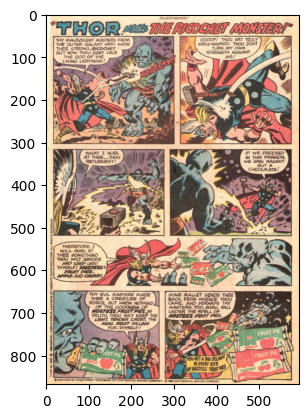

In [30]:
summarize_comic_strip('/content/comic4.jpg')